# Task 2

# Perform data cleaning and data exploratory data analysis (EDA) on a dataset of your choice

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
Data1 = pd.read_csv("/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("/kaggle/input/mental-health/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("/kaggle/input/mental-health/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [5]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

In [6]:
df2.head()

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0


In [7]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

<Figure size 1280x960 with 0 Axes>

In [8]:
df2.sort_values(by= "Schizophrenia" , inplace= True)
plt.figure(dpi= 200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show ()

<Figure size 1280x960 with 0 Axes>

In [9]:
df3.head()

,Entity,Code,Year,Nearly every day,More than half the days,Several days,Not at all
0,Appetite change,NaN,2014,4.6,5.1,15.5,74.8
1,Average across symptoms,NaN,2014,4.4,4.3,15.0,76.3
2,Depressed mood,NaN,2014,3.6,3.9,16.8,75.7
3,Difficulty concentrating,NaN,2014,3.5,3.6,10.9,82.1
4,Loss of interest,NaN,2014,4.4,5.4,16.3,73.8


In [10]:
print("\nSummary of the dataset:")
print(df3.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   10 non-null     object 
 1   Code                     0 non-null      float64
 2   Year                     10 non-null     int64  
 3   Nearly every day         10 non-null     float64
 4   More than half the days  10 non-null     float64
 5   Several days             10 non-null     float64
 6   Not at all               10 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 688.0+ bytes
None


In [11]:
print("\nMissing values in each column:")
print(df3.isnull().sum())


Missing values in each column:
Entity                      0
Code                       10
Year                        0
Nearly every day            0
More than half the days     0
Several days                0
Not at all                  0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

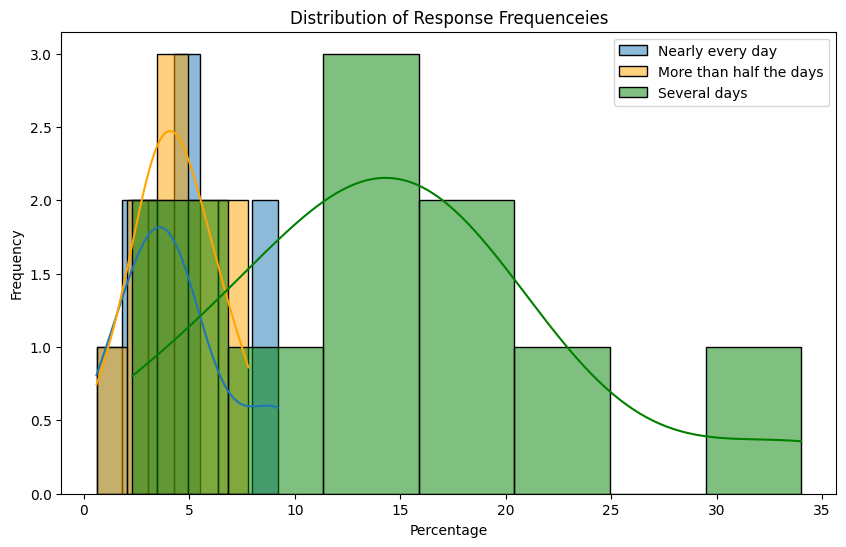

In [12]:
plt.figure(figsize=(10,6))
sb.histplot(df3['Nearly every day'], kde = True , label= 'Nearly every day')
sb.histplot(df3['More than half the days'], kde = True, color= 'orange', label = 'More than half the days')
sb.histplot(df3['Several days'], kde = True, color= 'green', label = 'Several days')

plt.title('Distribution of Response Frequenceies')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show

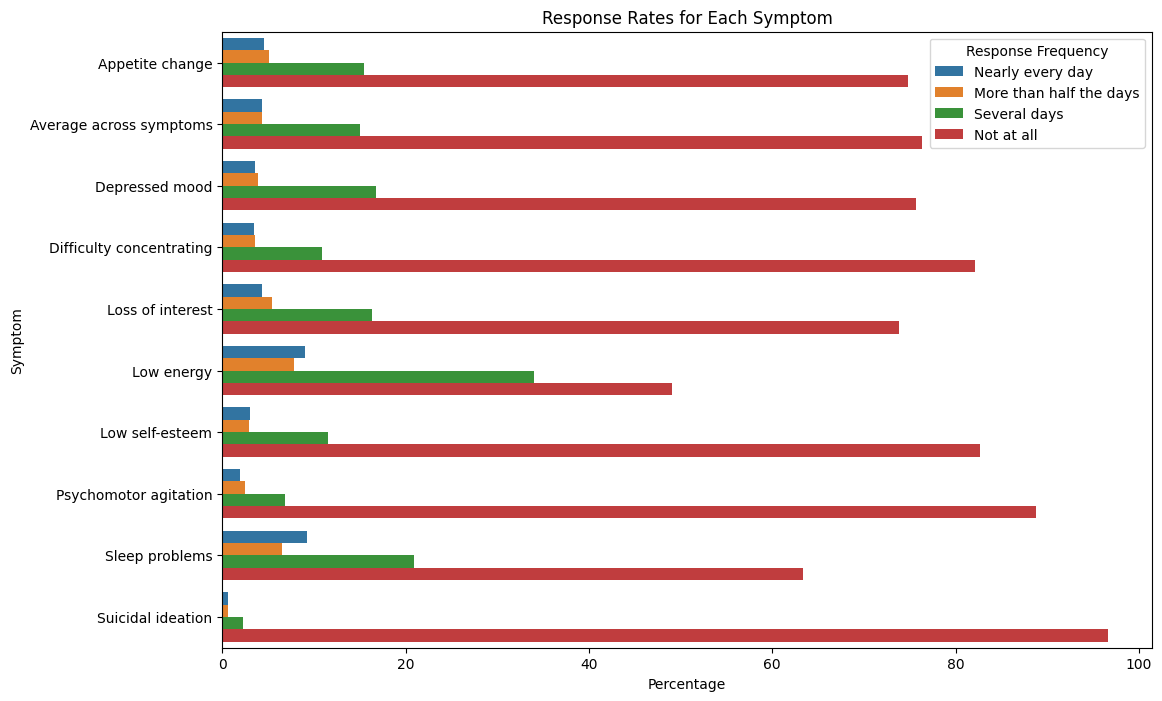

In [13]:
plt.figure(figsize=(12, 8))
df3_melted = df3.melt(id_vars=['Entity'], value_vars=['Nearly every day', 'More than half the days', 'Several days', 'Not at all'],
                      var_name='Response Frequency', value_name='Percentage')

sb.barplot(x='Percentage', y='Entity', hue='Response Frequency', data=df3_melted)
plt.title('Response Rates for Each Symptom')
plt.xlabel('Percentage')
plt.ylabel('Symptom')
plt.legend(title='Response Frequency')
plt.show()

In [14]:
df4.head()

,Entity,Code,Year,Number of countries with primary data on prevalence of mental disorders
0,Alcohol use disorders,NaN,2019,58
1,Amphetamine use disorders,NaN,2019,58
2,Anorexia nervosa,NaN,2019,27
3,Anxiety disorders,NaN,2019,58
4,Attention-deficit hyperactivity disorder,NaN,2019,172


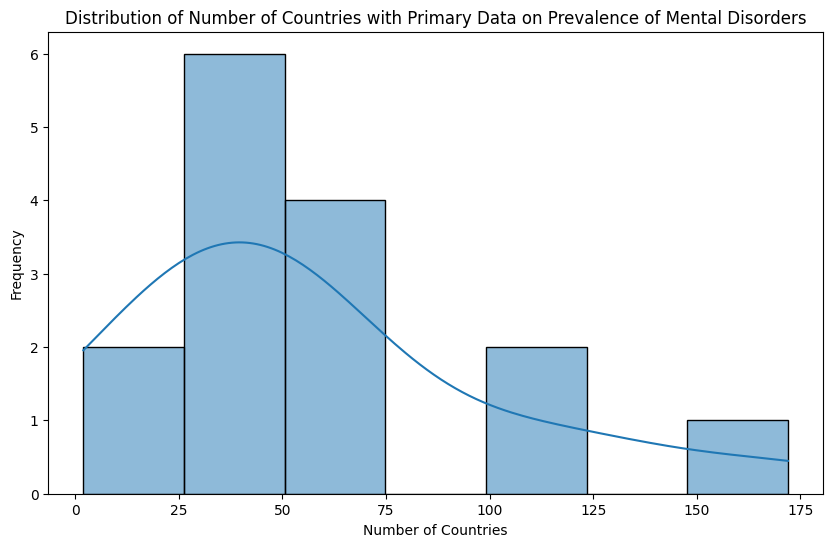

In [15]:
plt.figure(figsize=(10, 6))
sb.histplot(df4['Number of countries with primary data on prevalence of mental disorders'], kde=True)
plt.title('Distribution of Number of Countries with Primary Data on Prevalence of Mental Disorders')
plt.xlabel('Number of Countries')
plt.ylabel('Frequency')
plt.show()

In [16]:
print("\nSummary statistics for the numeric column:")
print(df4['Number of countries with primary data on prevalence of mental disorders'].describe())


Summary statistics for the numeric column:
count     15.000000
mean      56.733333
std       46.172760
min        2.000000
25%       31.000000
50%       41.000000
75%       63.000000
max      172.000000
Name: Number of countries with primary data on prevalence of mental disorders, dtype: float64


In [17]:
print("\nUnique values in 'Entity' column:")
print(df4['Entity'].unique())

print("\nUnique values in 'Year' column:")
print(df4['Year'].unique())


Unique values in 'Entity' column:
['Alcohol use disorders' 'Amphetamine use disorders' 'Anorexia nervosa'
 'Anxiety disorders' 'Attention-deficit hyperactivity disorder'
 'Autism spectrum disorders' 'Bipolar disorder' 'Bulimia nervosa'
 'Cannabis use disorders' 'Cocaine use disorders' 'Dysthymia'
 'Major depressive disorder' 'Opioid use disorders'
 'Other drug use disorders' 'Personality disorders']

Unique values in 'Year' column:
[2019]


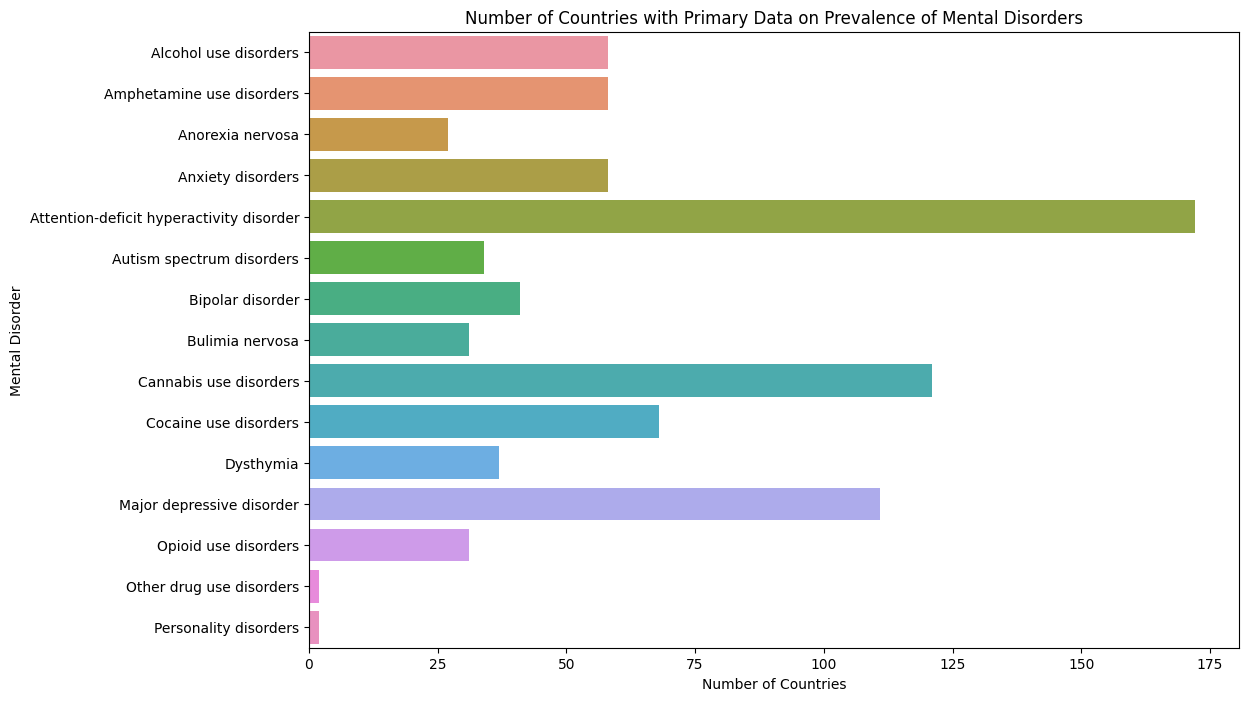

In [18]:
plt.figure(figsize=(12, 8))
sb.barplot(x='Number of countries with primary data on prevalence of mental disorders', y='Entity', data=df4)
plt.title('Number of Countries with Primary Data on Prevalence of Mental Disorders')
plt.xlabel('Number of Countries')
plt.ylabel('Mental Disorder')
plt.show()